In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import time
from scipy.stats import entropy
from collections import Counter
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.metrics import brier_score_loss
df=pd.read_csv("heart.csv")
df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,M,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,F,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,M,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,F,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,F,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,M,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,M,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,M,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df=df.replace('?',0) #replace null values with 0
df['trtbps']=df['trtbps'].astype(int) #converting to int from string in dataset all the numbers r stored as strings
df['chol']=df['chol'].astype(int)
df[['trtbps','exng','cp','age']]=df[['trtbps','exng','cp','age']].astype(float)
y=df['output'].astype(float)
df=df.replace('M',0)
df=df.replace('F',1)
x=df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler # minmax scaler used to bring all the values to o t0 1
sclar=MinMaxScaler() 
x_small=sclar.fit_transform(x) #fit transform is used to get the values to specific scale
x_small

array([[0.70833333, 0.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 0.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 1.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x_small,y,test_size=0.3,random_state=1)

In [ ]:
#USER DEFINED FUNCTION TO DISPLAY THE CONFUSION MATRIX
def display(i):
 cm_disp=ConfusionMatrixDisplay(confusion_matrix=i,display_labels=['no heart attack','heart attack'])
 cm_disp.plot()

In [ ]:
#USER DEFINED FUNCTION TO DISPLAY ROC-AUC PLOT
def plot_roc(y_test,probs):
  fpr,tpr,threshold=roc_curve(y_test,probs)
  roc_auc=auc(fpr,tpr)
  print('ROC AUC=%0.2f'%roc_auc)
  plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'b--')
  plt.xlim([0,1])
  plt.ylim([0,1.05])
  plt.xlabel('False Postive Rate')
  plt.ylabel('True Postive Rate')
  plt.show()

In [ ]:
#USER DEFINED FUNCTION TO DISPLAY PRECISION-RECALL GRAPH
def show(y_test,y_predicted):
 precision, recall, _ = precision_recall_curve(y_test, y_predicted)
 disp = PrecisionRecallDisplay(precision=precision, recall=recall)
 disp.plot()

In [ ]:
#USER DEFINED FUNCTION TO VISUALIZE THE CORRELATION AMONG DIFFERENT FEATURES IN THE DATASET
def heatmap(x,y,df):
  sns.heatmap(df.corr(),cmap="OrRd",annot=True)
  plt.figure(figsize=(5000,5000))
  plt.show()

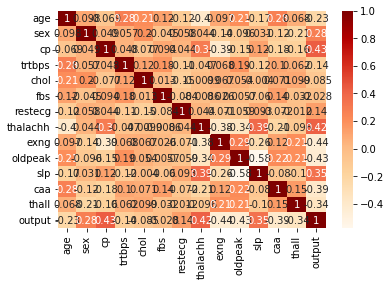

<Figure size 360000x360000 with 0 Axes>

In [ ]:
heatmap(20,10,df)

In [ ]:
#KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
neigh.predict(X_test)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0.])

In [ ]:
start=time.time()
neigh.fit(X_train,y_train)
print("k-nn score : ",neigh.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

k-nn score :  0.7472527472527473
Time for Training: 0.009205341339111328


[[30 11]
 [12 38]]
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72        41
         1.0       0.78      0.76      0.77        50

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



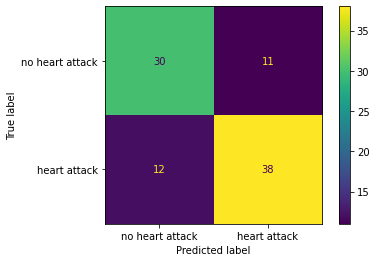

In [ ]:
y_predicted=neigh.predict(X_test)
probs_neigh=neigh.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))


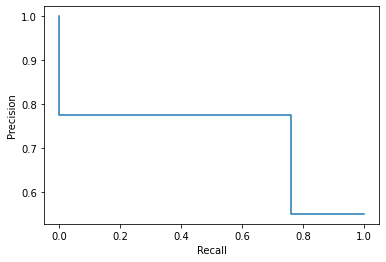

In [ ]:
show(y_test,y_predicted)

In [ ]:
print("No.of correctly classified samples for KNN Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for KNN Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score for KNN Classifier: ",brier_score_loss(y_test, probs_neigh))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for KNN Classifier is:  68
No.of wrongly classified samples for KNN Classifier is:  23
Brier score for KNN Classifier:  0.2222222222222222


ROC AUC=0.76


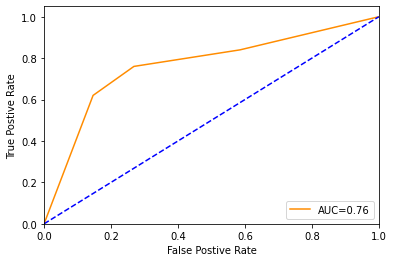

In [ ]:
plot_roc(y_test,probs_neigh)

In [ ]:
score=[]
for k in range(1,12):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train,y_train)
  score.append(neigh.score(X_test,y_test))


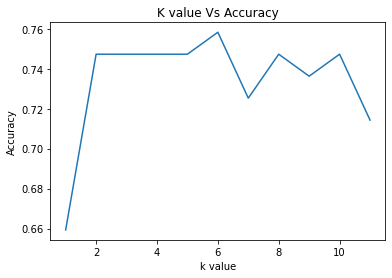

In [ ]:
import matplotlib.pyplot as plt
k=[1,2,3,4,5,6,7,8,9,10,11]
plt.plot(k,score)
plt.title("K value Vs Accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#MLP CLASSIFIER
s=X_train
h=y_train
clf1 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(9, ), random_state=1)
clf1.fit(s, h)
clf1.predict(X_test)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0.])

In [ ]:
start=time.time()
clf1.fit(s,h) # to train the model of knn so  we are giving both input and output
print('MLP score:',clf1.score(X_test,y_test)) #score is used to find accuracy by using classifier
stop=time.time()
print('Time for Training:',stop-start)

MLP score: 0.7032967032967034
Time for Training: 0.14173054695129395


[[27 14]
 [13 37]]
              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67        41
         1.0       0.73      0.74      0.73        50

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



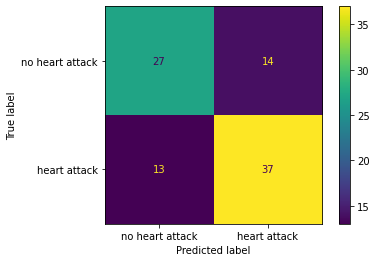

In [ ]:
y_predicted=clf1.predict(X_test)
probs_mlp=clf1.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

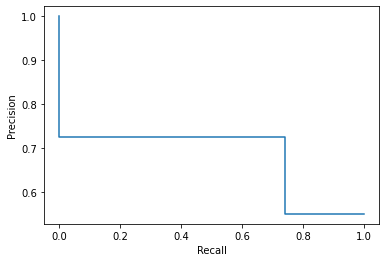

In [ ]:
show(y_test,y_predicted)

In [ ]:
print("No.of correctly classified samples for MLP Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for MLP Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score for MLP Classifier: ",brier_score_loss(y_test, probs_mlp))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for MLP Classifier is:  64
No.of wrongly classified samples for MLP Classifier is:  27
Brier score for MLP Classifier:  0.28441614641728713


ROC AUC=0.78


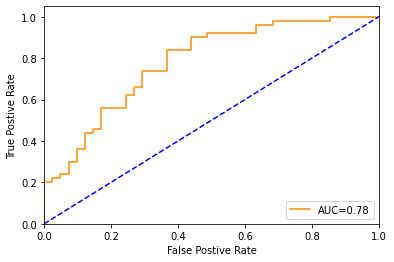

In [ ]:
plot_roc(y_test,probs_mlp)

In [ ]:
#SVM CLASSIFIER
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [ ]:
clf=svm.SVC(kernel='linear') #kernel fn is linear here finding accuracy using different kernal fns
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for linear kernal:',clf.score(X_test,y_test)) #finding how accurate results are in testing set
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for linear kernal: 0.8461538461538461
Time for Training: 0.0029535293579101562


[[32  9]
 [ 5 45]]
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82        41
         1.0       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



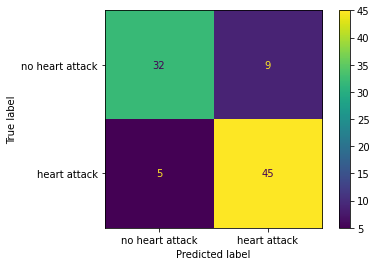

In [ ]:
y_predicted=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

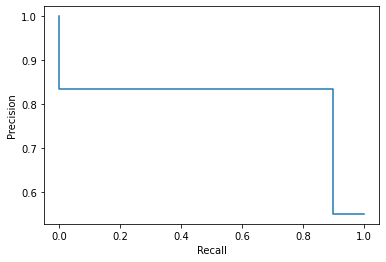

In [ ]:
show(y_test,y_predicted)

In [ ]:
print("No.of correctly classified samples for SVM Linear kernel is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for SVM Linear kernel is: ",zero_one_loss(y_test, y_predicted, normalize=False))



No.of correctly classified samples for SVM Linear kernel is:  77
No.of wrongly classified samples for SVM Linear kernel is:  14


In [ ]:
clf=svm.SVC(kernel='poly')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for poly kernal:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for poly kernal: 0.945054945054945
Time for Training: 0.006526470184326172


[[37  4]
 [ 1 49]]
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.94        41
         1.0       0.92      0.98      0.95        50

    accuracy                           0.95        91
   macro avg       0.95      0.94      0.94        91
weighted avg       0.95      0.95      0.94        91



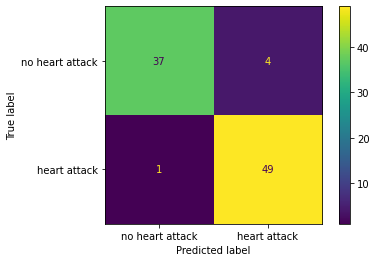

In [ ]:
y_predicted=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [ ]:
print("No.of correctly classified samples for SVM poly kernel is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for SVM poly kernel is: ",zero_one_loss(y_test, y_predicted, normalize=False))


No.of correctly classified samples for SVM poly kernel is:  86
No.of wrongly classified samples for SVM poly kernel is:  5


In [ ]:

clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for rbf kernal:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for rbf kernal: 0.9120879120879121
Time for Training: 0.003960132598876953


[[34  7]
 [ 1 49]]
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89        41
         1.0       0.88      0.98      0.92        50

    accuracy                           0.91        91
   macro avg       0.92      0.90      0.91        91
weighted avg       0.92      0.91      0.91        91



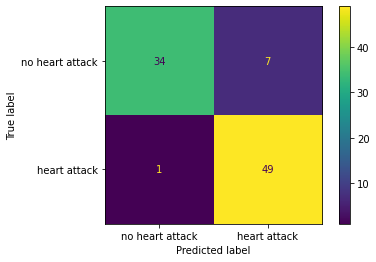

In [ ]:
y_predicted=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [ ]:
print("No.of correctly classified samples for SVM rbf kernel is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for SVM rbf kernel is: ",zero_one_loss(y_test, y_predicted, normalize=False))


No.of correctly classified samples for SVM rbf kernel is:  83
No.of wrongly classified samples for SVM rbf kernel is:  8


In [ ]:
clf=svm.SVC(kernel='sigmoid')
clf.fit(X_train,y_train)
start=time.time()
clf.fit(X_test,y_test)
print('SVM Score for sigmoid kernal:',clf.score(X_test,y_test))
stop=time.time()
print('Time for Training:',stop-start)

SVM Score for sigmoid kernal: 0.8241758241758241
Time for Training: 0.00562739372253418


[[28 13]
 [ 3 47]]
              precision    recall  f1-score   support

         0.0       0.90      0.68      0.78        41
         1.0       0.78      0.94      0.85        50

    accuracy                           0.82        91
   macro avg       0.84      0.81      0.82        91
weighted avg       0.84      0.82      0.82        91



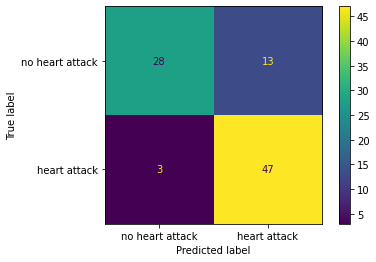

In [ ]:
y_predicted=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [ ]:
print("No.of correctly classified samples for SVM sigmoid kernel is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for SVM sigmoid kernel is: ",zero_one_loss(y_test, y_predicted, normalize=False))


No.of correctly classified samples for SVM sigmoid kernel is:  75
No.of wrongly classified samples for SVM sigmoid kernel is:  16


In [ ]:
#Decision tree classifier
start=time.time()
model = DecisionTreeClassifier(max_depth=5) #max depth of tree should be 5
model = model.fit(X_train,y_train)
print('Tree Graph Classifier Score : ',model.score(X_train,y_train))
stop=time.time()
print('Time for Training:',stop-start)

Tree Graph Classifier Score :  0.9339622641509434
Time for Training: 0.004063129425048828


[[28 13]
 [12 38]]
              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69        41
         1.0       0.75      0.76      0.75        50

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91



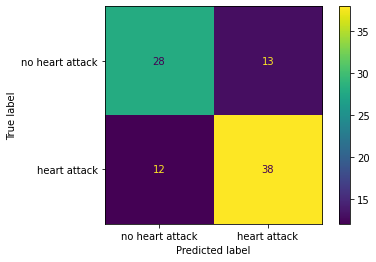

In [ ]:
y_predicted=model.predict(X_test)
probs_tree=model.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

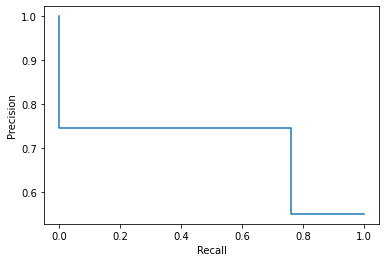

In [ ]:
show(y_test,y_predicted)

In [ ]:
print("No.of correctly classified samples for Decison tree Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Desicion tree Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_tree))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Decison tree Classifier is:  66
No.of wrongly classified samples for Desicion tree Classifier is:  25
Brier score:  0.23493683164712686


ROC AUC=0.77


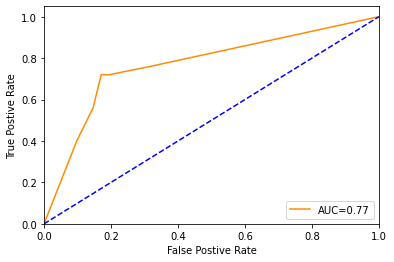

In [ ]:
plot_roc(y_test,probs_tree)

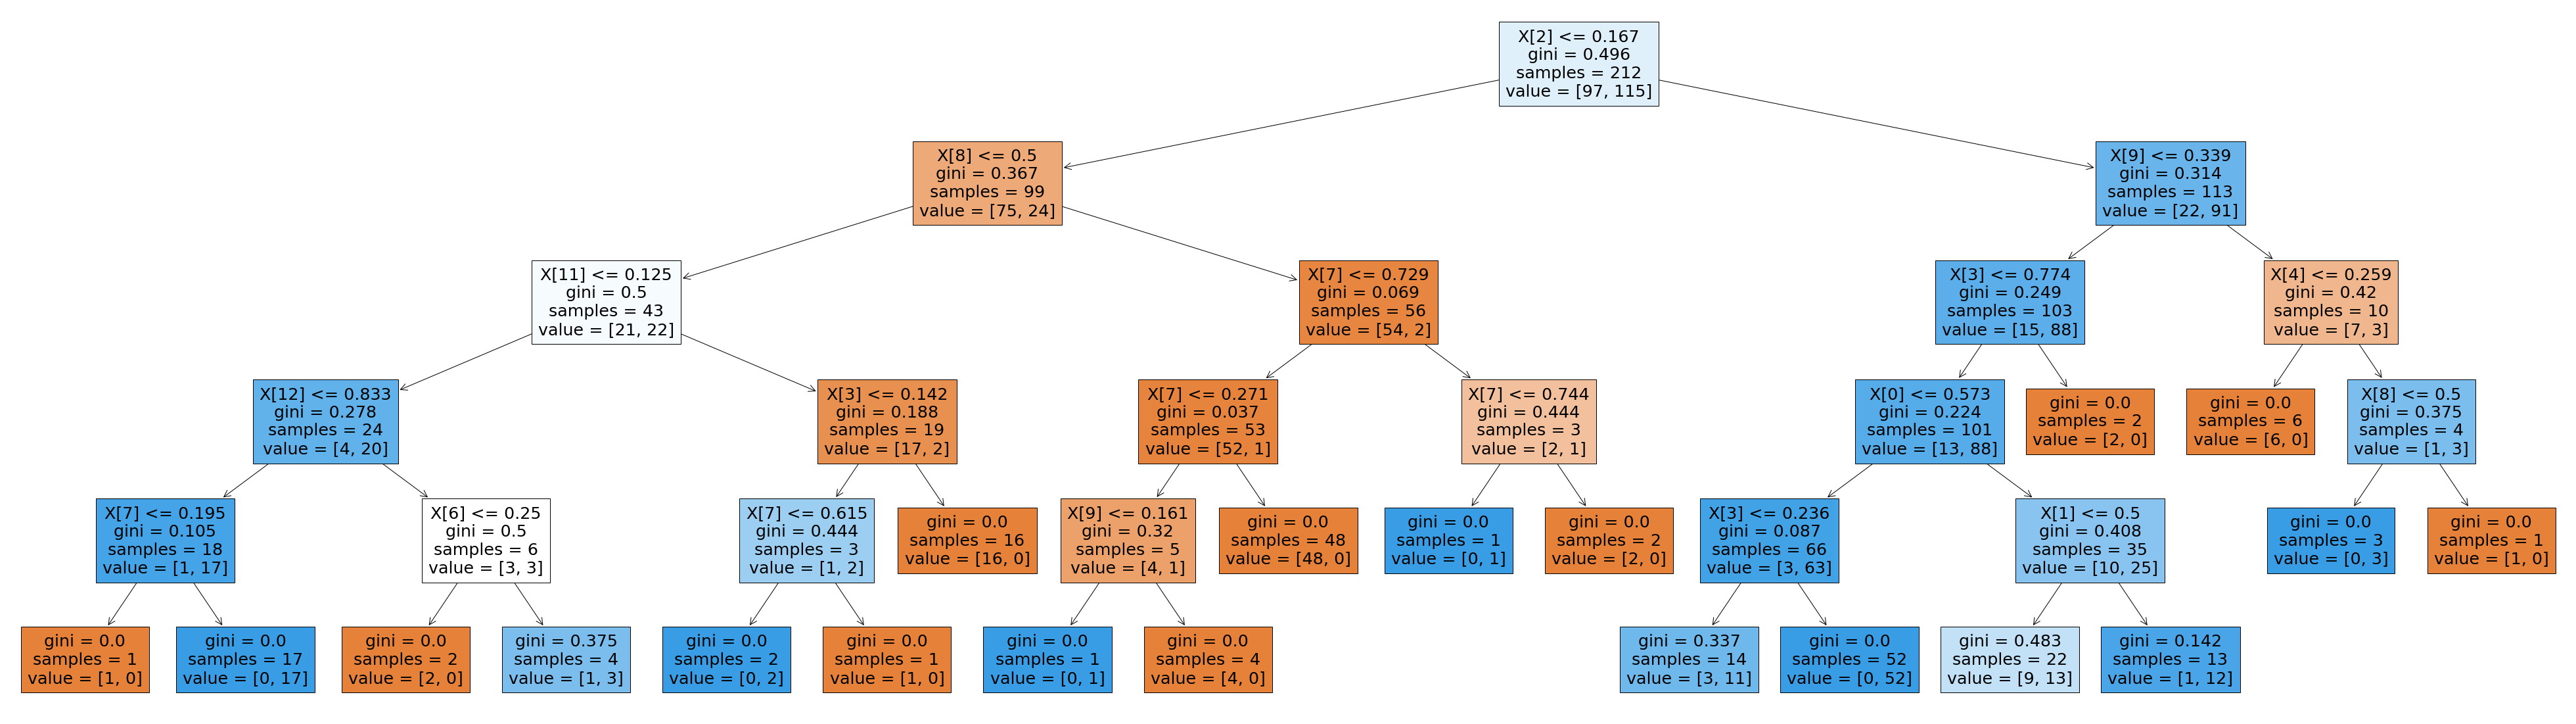

In [ ]:
plt.figure(figsize=(70,20)) #fig length bredth
tree.plot_tree(model, filled=True) #plot tree is fn name to plot decision tree  all the values in the decision tree come from training data set given above
plt.show()

In [ ]:
model = DecisionTreeClassifier(criterion="entropy") 
#saying that through entropy build tree
start=time.time()
model = model.fit(X_train,y_train)
print('Tree Graph Classifier Score : ',model.score(X_train,y_train))
stop=time.time()
print('Time for Training:',stop-start)

Tree Graph Classifier Score :  1.0
Time for Training: 0.0049207210540771484


[[31 10]
 [14 36]]
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72        41
         1.0       0.78      0.72      0.75        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



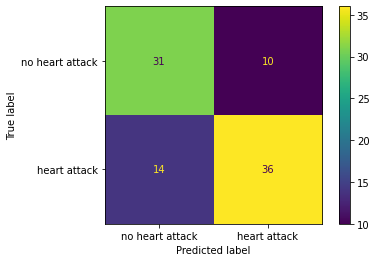

In [ ]:
y_predicted=model.predict(X_test)
probs_tree=model.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

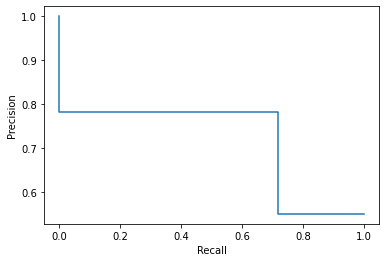

In [ ]:
show(y_test,y_predicted)

In [ ]:
print("No.of correctly classified samples for Decison tree Classifier(entropy based) is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Desicion tree Classifier(entropy based) is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_tree))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Decison tree Classifier(entropy based) is:  67
No.of wrongly classified samples for Desicion tree Classifier(entropy based) is:  24
Brier score:  0.26373626373626374


ROC AUC=0.74


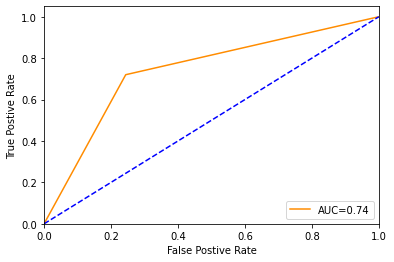

In [ ]:
plot_roc(y_test,probs_tree)

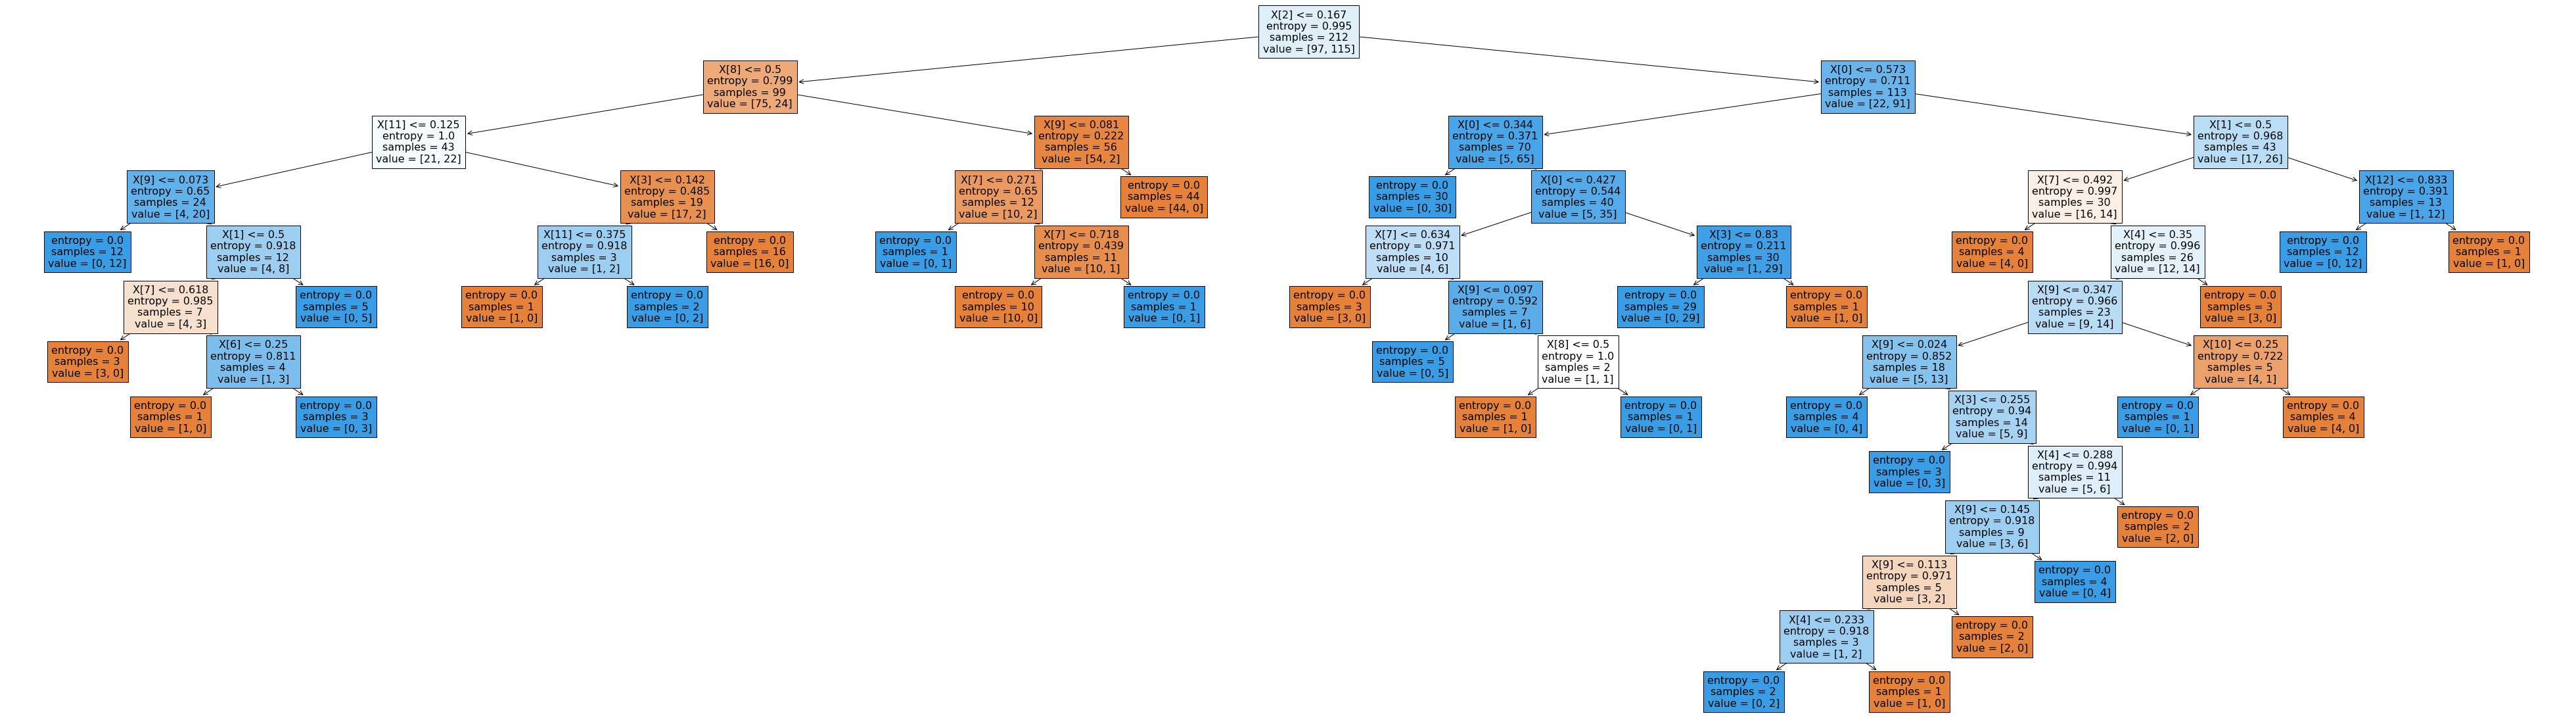

In [ ]:
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

In [ ]:
#Naive bayes CLASSIFIER
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
s=X_train
h=y_train
model.fit(s,h)
model.predict(X_test)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0.])

In [ ]:
start=time.time()
model.fit(s,h) # to train the model of knn so  we are giving both input and output
print('Naive Bayes score:',model.score(X_test,y_test)) #score is used to find accuracy by using classifier
stop=time.time()
print('Time for Training:',stop-start)

Naive Bayes score: 0.7912087912087912
Time for Training: 0.004524707794189453


[[32  9]
 [10 40]]
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77        41
         1.0       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



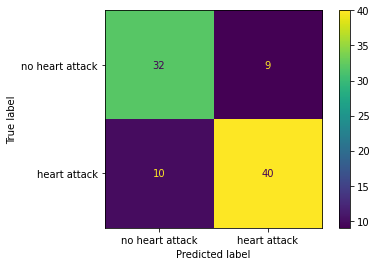

In [ ]:
y_predicted=model.predict(X_test)
probs_nb=model.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

In [ ]:
print("No.of correctly classified samples for Naive-Bayes Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Naive-Bayes Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_nb))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Naive-Bayes Classifier is:  72
No.of wrongly classified samples for Naive-Bayes Classifier is:  19
Brier score:  0.17715737107391655


ROC AUC=0.88


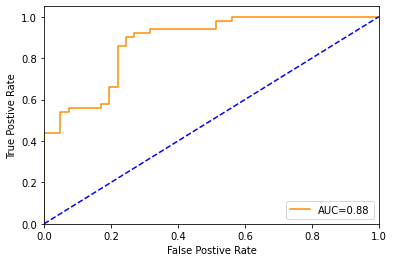

In [ ]:
plot_roc(y_test,probs_nb)

Logistic Regression score: 0.7802197802197802
Time for Training: 0.011877298355102539
[[28 13]
 [ 3 47]]
              precision    recall  f1-score   support

         0.0       0.90      0.68      0.78        41
         1.0       0.78      0.94      0.85        50

    accuracy                           0.82        91
   macro avg       0.84      0.81      0.82        91
weighted avg       0.84      0.82      0.82        91



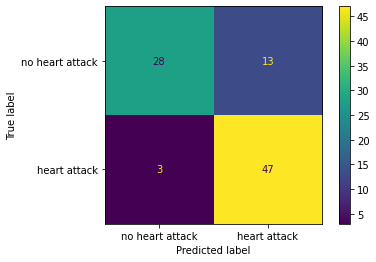

In [ ]:
lr=LogisticRegression(random_state=2)
start=time.time()
lr.fit(X_train,y_train)
print('Logistic Regression score:',lr.score(X_test,y_test)) #score is used to find accuracy by using classifier
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=clf.predict(X_test)
probs_lr=lr.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))


In [ ]:
print("No.of correctly classified samples for Logistic Regression Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Logistic Regression Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_lr))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Logistic Regression Classifier is:  75
No.of wrongly classified samples for Logistic Regression Classifier is:  16
Brier score:  0.14151583964299497


ROC AUC=0.88


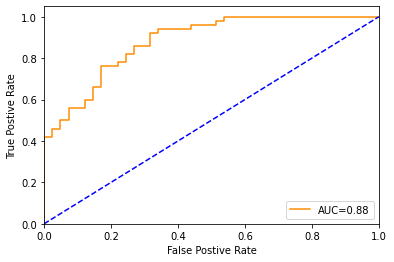

In [ ]:
plot_roc(y_test,probs_lr)

Random Forest score: 0.7802197802197802
Time for Training: 0.14286231994628906
[[29 12]
 [12 38]]
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71        41
         1.0       0.76      0.76      0.76        50

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91



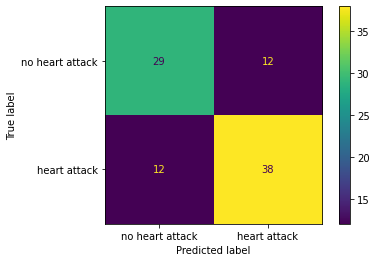

In [ ]:
#Random Forest Classifier
rf=RandomForestClassifier()
start=time.time()
rf.fit(X_train,y_train)
print('Random Forest score:',lr.score(X_test,y_test)) #score is used to find accuracy by using classifier
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=rf.predict(X_test)
probs_rf=rf.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))

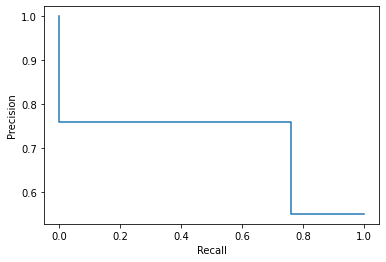

In [ ]:
show(y_test,y_predicted)# Displays precision-recall graph

In [ ]:

print("No.of correctly classified samples for Random Forest Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Random Forest Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_rf))#Mean squared difference between predicted probability and actual outcome

No.of correctly classified samples for Random Forest Classifier is:  67
No.of wrongly classified samples for Random Forest Classifier is:  24
Brier score:  0.1599076923076923


ROC AUC=0.85


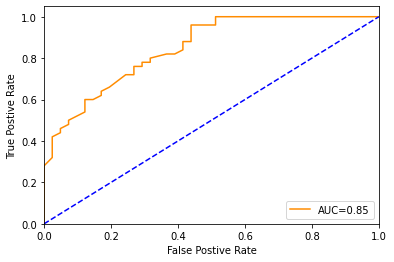

In [ ]:
plot_roc(y_test,probs_rf)

Naive Bayes score:  0.7912087912087912
Time for Training: 0.003320932388305664
[[32  9]
 [10 40]]
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77        41
         1.0       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



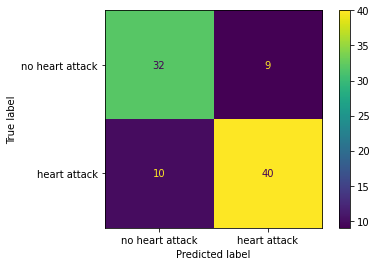

In [ ]:
#GAUSSIAN NAIVE-BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB
g_nb = GaussianNB()
start=time.time()
g_nb.fit(X_train, y_train)
print("Naive Bayes score: ",g_nb.score(X_test, y_test))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=g_nb.predict(X_test)
probs_gnb=g_nb.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))


In [ ]:
print("No.of correctly classified samples for Gaussian Naive-Bayes Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Gaussian Naive-Bayes Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_gnb))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Gaussian Naive-Bayes Classifier is:  72
No.of wrongly classified samples for Gaussian Naive-Bayes Classifier is:  19
Brier score:  0.17715737107391655


ROC AUC=0.88


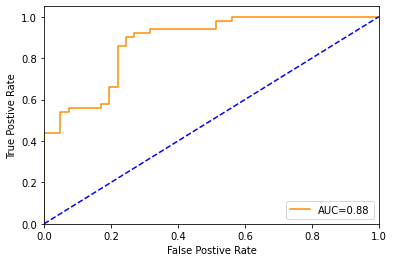

In [ ]:
plot_roc(y_test,probs_gnb)

Bernouli Naive Bayes score:  0.7362637362637363
Time for Training: 0.00357818603515625
[[28 13]
 [11 39]]
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70        41
         1.0       0.75      0.78      0.76        50

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91



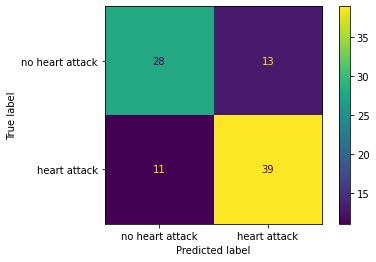

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
start=time.time()
bnb.fit(X_train, y_train)
print("Bernouli Naive Bayes score: ",bnb.score(X_test, y_test))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=bnb.predict(X_test)
probs_bnb=bnb.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))


In [ ]:
print("No.of correctly classified samples for Bernoulli Naive-Bayes Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Bernoulli Naive-Bayes Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_bnb))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Bernoulli Naive-Bayes Classifier is:  67
No.of wrongly classified samples for Bernoulli Naive-Bayes Classifier is:  24
Brier score:  0.17887187877877195


ROC AUC=0.85


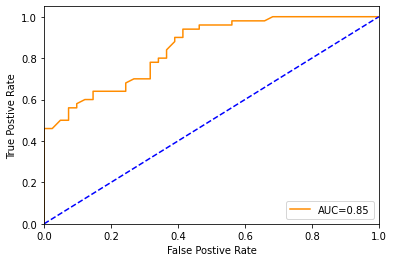

In [ ]:
plot_roc(y_test,probs_bnb)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
start=time.time()
regressor.fit(x, y) 
print("Random forest Regressor score: ",regressor.score(X_test, y_test))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=regressor.predict(X_test)

Random forest Regressor score:  0.0859826829268292
Time for Training: 0.18320274353027344


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


AdaBoostClassifier score: 0.9481132075471698
Time for Training: 0.09010910987854004
[[31 10]
 [14 36]]
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72        41
         1.0       0.78      0.72      0.75        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



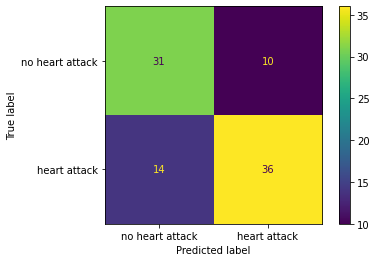

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
start=time.time()
model = abc.fit(X_train, y_train)
print("AdaBoostClassifier score:",abc.score(X_train, y_train))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=abc.predict(X_test)
probs_abc=abc.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))



In [ ]:
print("No.of correctly classified samples for AdaBoost Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for AdaBoost Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_abc))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for AdaBoost Classifier is:  67
No.of wrongly classified samples for AdaBoost Classifier is:  24
Brier score:  0.2337859494306263


ROC AUC=0.81


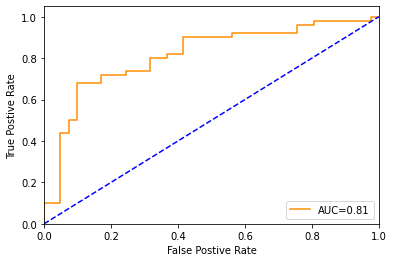

In [ ]:
plot_roc(y_test,probs_abc)

 Multinomial naive Bayes score:  0.7912087912087912
Time for Training: 0.008593320846557617
[[31 10]
 [ 9 41]]
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77        41
         1.0       0.80      0.82      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



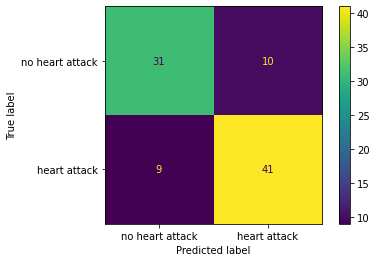

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
start=time.time()
clf.fit(X_train, y_train)
print(" Multinomial naive Bayes score: ",clf.score(X_test, y_test))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=clf.predict(X_test)
probs_clf=clf.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))



In [ ]:
print("No.of correctly classified samples for Multinomial Naive-Bayes Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Multinomial Naive-Bayes Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_clf))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Multinomial Naive-Bayes Classifier is:  72
No.of wrongly classified samples for Multinomial Naive-Bayes Classifier is:  19
Brier score:  0.16024516824257176


ROC AUC=0.85


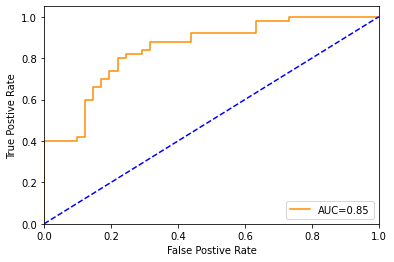

In [ ]:
plot_roc(y_test,probs_clf)

Radius Neighbours Classifier score:  0.5424528301886793
Time for Training: 0.0057544708251953125
[[ 0 41]
 [ 0 50]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        41
         1.0       0.55      1.00      0.71        50

    accuracy                           0.55        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.30      0.55      0.39        91



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


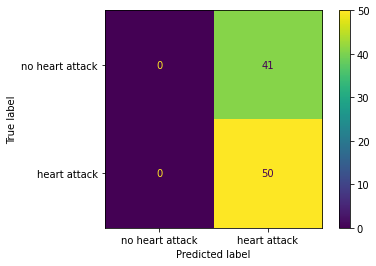

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier
neigh = RadiusNeighborsClassifier(radius=5.0)
start=time.time()
neigh.fit(X_train, y_train)
print("Radius Neighbours Classifier score: ",neigh.score(X_train,y_train))
stop=time.time()
print('Time for Training:',stop-start)
y_predicted=neigh.predict(X_test)
probs_neigh=neigh.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,y_predicted)
print(cm)
display(cm)
print(classification_report(y_test,y_predicted))



In [ ]:
print("No.of correctly classified samples for Radius Neighbours Classifier is: ",accuracy_score(y_test, y_predicted, normalize=False)) # Gives the number of correctly classified samples
print("No.of wrongly classified samples for Radius Neighbours Classifier is: ",zero_one_loss(y_test, y_predicted, normalize=False))
print("Brier score: ",brier_score_loss(y_test, probs_neigh))#Mean squared difference between predicted probability and actual outcome


No.of correctly classified samples for Radius Neighbours Classifier is:  50
No.of wrongly classified samples for Radius Neighbours Classifier is:  41
Brier score:  0.2476036112339068


ROC AUC=0.50


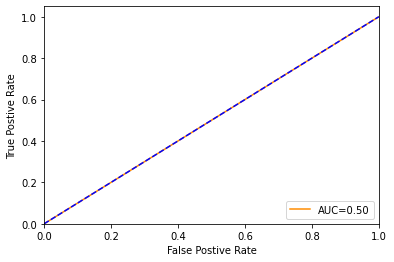

In [ ]:
plot_roc(y_test,probs_neigh)

In [ ]:
#LINEAR REGRESSION
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=linear_model.LinearRegression()
start=time.time()
reg.fit(X_train,y_train)
print("Linear Regression score : ",reg.score(X_train,y_train))
stop=time.time()
print("Time taken : ",stop-start)
y_predicted=reg.predict(X_test)

Linear Regression score :  0.5397017588879358
Time taken :  0.018216848373413086


In [ ]:
print("Coefficient : ",reg.coef_)
print("Mean square root : ",mean_squared_error(y_test,y_predicted))
print("r2 score : ",r2_score(y_test,y_predicted))

Coefficient :  [-0.0831669   0.19011273  0.43304507 -0.25838605 -0.16081655  0.01639502
  0.14495953  0.44867063 -0.15680061 -0.52618714  0.06978659 -0.32259044
 -0.17534964]
Mean square root :  0.14371859581649718
r2 score :  0.419446979533457


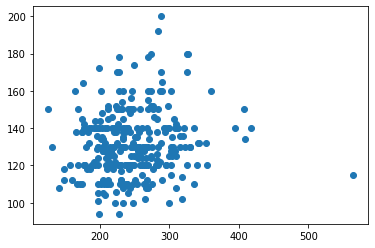

In [ ]:
#K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.scatter(df['chol'],df['trtbps'])
plt.show()

In [ ]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted=km.fit_predict(df[['chol','trtbps']])
y_predicted

array([2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0,
       0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1,
       0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0,

In [ ]:
df['cluster']=y_predicted
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cluster
0,63.0,0,3.0,145.0,233,1,0,150,0.0,2.3,0,0,1,1,2
1,37.0,0,2.0,130.0,250,0,1,187,0.0,3.5,0,0,2,1,2
2,41.0,1,1.0,130.0,204,0,0,172,0.0,1.4,2,0,2,1,0
3,56.0,0,1.0,120.0,236,0,1,178,0.0,0.8,2,0,2,1,2
4,57.0,1,0.0,120.0,354,0,1,163,1.0,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,1,0.0,140.0,241,0,1,123,1.0,0.2,1,0,3,0,2
299,45.0,0,3.0,110.0,264,0,1,132,0.0,1.2,1,0,3,0,2
300,68.0,0,0.0,144.0,193,1,1,141,0.0,3.4,1,2,3,0,0
301,57.0,0,0.0,130.0,131,0,1,115,1.0,1.2,1,1,3,0,0


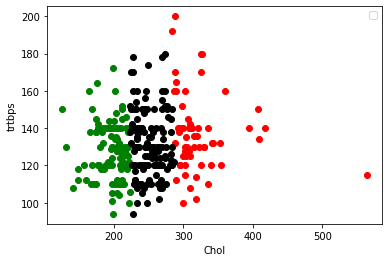

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.chol,df1['trtbps'],color='green')
plt.scatter(df2.chol,df2['trtbps'],color='red')
plt.scatter(df3.chol,df3['trtbps'],color='black')
plt.xlabel('Chol')
plt.ylabel('trtbps')
plt.legend()

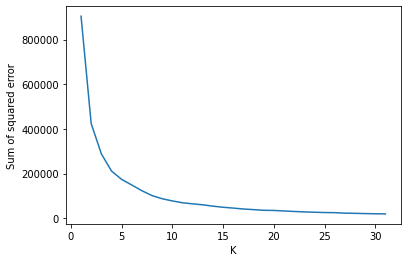

In [ ]:
#ELBOW METHOD
k_range=range(1,32)
sse=[]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['chol','trtbps']])
  sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)
